## DATA MAPPING

## Importing the Essential Libraries, Metrics

In [317]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

# Customize visualization
# Seaborn and matplotlib visualization.
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 

# Plotly visualization .
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

# Display markdown formatted output like bold, italic bold etc.
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [318]:
housing = pd.read_csv("train.csv")

## Variable Description, Identification, and Correction ##
> Describe what each of the variable indicates and identify our response and predictor variables. Then seperate the categorical variables from numerical variables (i.e., pandas object, float64 or int64 data types).

In [319]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [320]:
# drop Id column
df = housing
df = df.drop(['Id'],axis =1)

In [321]:
bold('**Shape of our data:**')
display(df.shape)

**Shape of our data:**

(1460, 80)

In [322]:
bold('**Name of our variables (1st 20):**')
display(df.columns[:20].values)

**Name of our variables (1st 20):**

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd'], dtype=object)

In [323]:
# Let's first inspect how many kinds of data types that we have to deal with.
bold('**Data types of our variables:**')
display(df.dtypes.value_counts())

**Data types of our variables:**

object     43
int64      34
float64     3
dtype: int64

In [324]:
# Extract numerical variables first.
num_type = df.select_dtypes(include = ['int64', 'float64'])
bold('**Numerical variables:**')
display(num_type.head(3))

bold('**Name of numerical variables:**')
display(num_type.columns.values)

**Numerical variables:**

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  

[3 rows x 37 columns]

**Name of numerical variables:**

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [325]:
df.describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

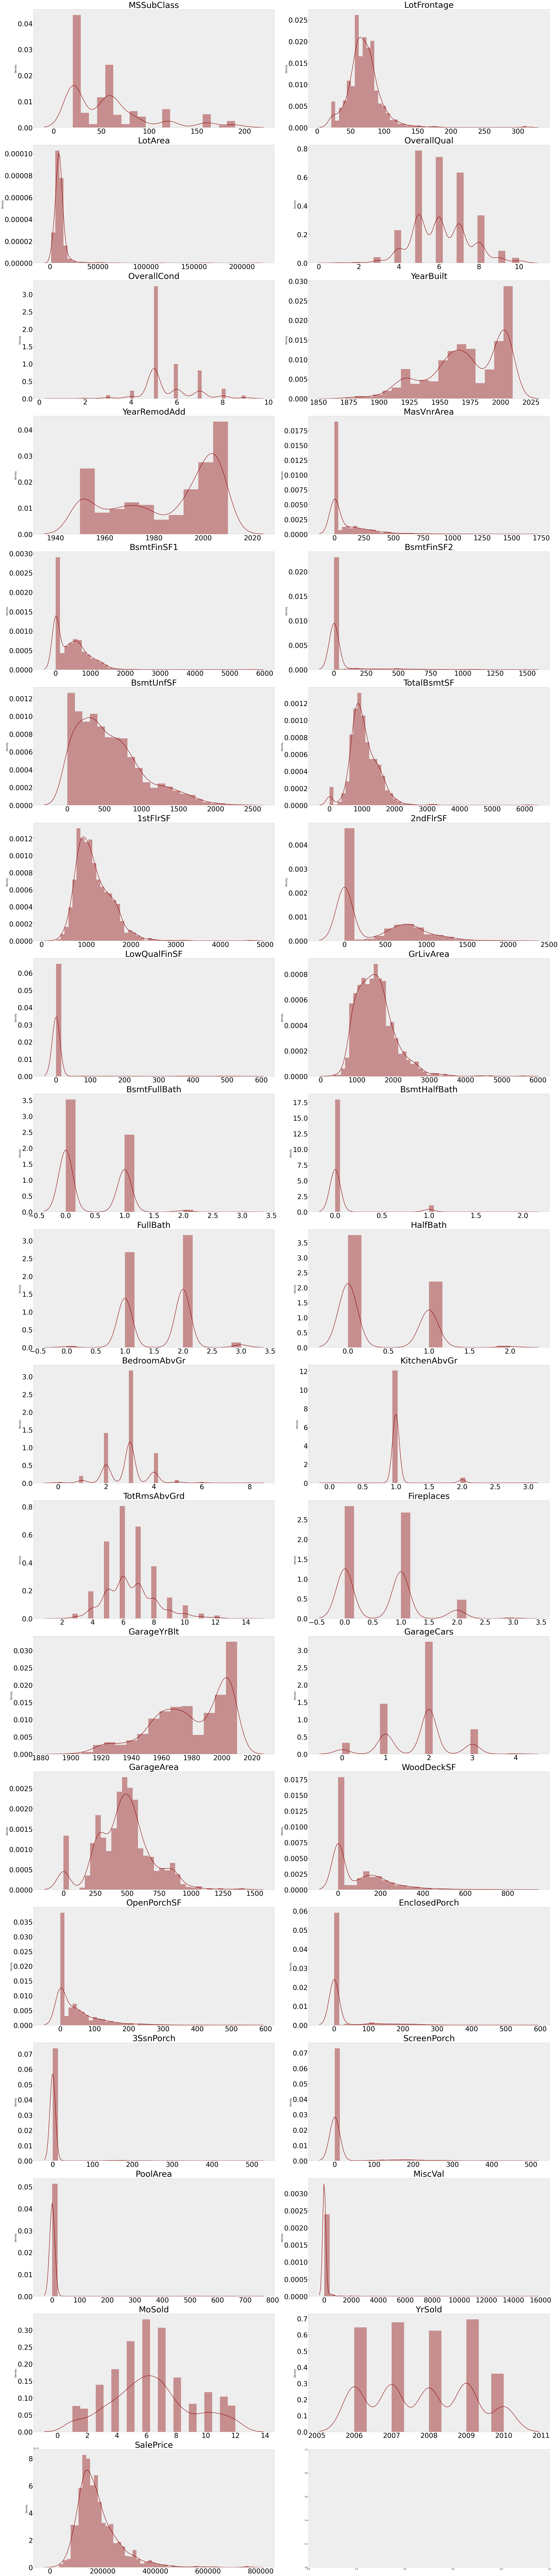

In [326]:
# Plot histogram of numerical variables to validate pandas intuition.

fig, axes = plt.subplots(nrows = 19, ncols = 2, figsize = (40, 200))
for ax, column in zip(axes.flatten(), num_type.columns):
    sns.distplot(num_type[column].dropna(), ax = ax, color = 'darkred')
    ax.set_title(column, fontsize = 43)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
    ax.set_xlabel('')
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

> #### Insight
>
> Well we can clearly see some distributions are continuous (like LotFrontage, LotArea, and YearBuilt) and some 
 are discrete (like MSSubClass, OverallQual, OverallCond, BsmtFullBath, and HalfBath etc.). Let's correct the data types    accordingly. Reading data description we see some variables are actually categorical (like like MSSubClass, OverallQual,  and OverallCond).

>  Hence we would explicitly cast them into categorical variables

In [327]:
# Convert MSSubClass, OverallQual, OverallCond, MoSold, YrSold into categorical variables.

df.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')

In [328]:
# Check out the data types after correction

bold('**Data types after correction:**')
display(df.dtypes.value_counts())

**Data types after correction:**

object     48
int64      29
float64     3
dtype: int64

### Now I would like to write 3 functions for different Plotly plots.

In [329]:
# Function to plot bar chart

def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(
    x = x,
    y = y,
    marker = dict(color = y, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

# Function to plot scatter plot

def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)    
    
# Function to plot histogram

def plot_histogram(x, title, yaxis, color):
    trace = go.Histogram(x = x,
                        marker = dict(color = color))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

## Outliers Treatment 

In [330]:
# Sactter plot of GrLivArea vs SalePrice.
scatter_plot(df.GrLivArea, df.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

In [331]:
# Drop observations where GrLivArea is greater than 4000 sq.ft
df.drop(df[df.GrLivArea>4000].index, inplace = True)
df.reset_index(drop = True, inplace = True)

In [332]:
# Plot the sactter plot again of GrLivArea vs SalePrice to see if outliers are gone.
scatter_plot(df.GrLivArea, df.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

## Imputing Missing Variables 

In [333]:
# Separating target variable
y_sales_price = df['SalePrice']

# Drop SalePrice from data frame
df.drop(['SalePrice'],axis=1, inplace = True)


In [334]:
# Columns with missing observation

missing_columns = df.columns[df.isnull().any()].values

# Number of colums with missng observation
total_columns = np.count_nonzero(df.isna().sum())
print('we have', total_columns, 'features with missing values and those features ( with missing values) are: \n\n', missing_columns)

we have 19 features with missing values and those features ( with missing values) are: 

 ['LotFrontage' 'Alley' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Electrical' 'FireplaceQu'
 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond'
 'PoolQC' 'Fence' 'MiscFeature']


In [335]:
# Get and plot only the features (with missing values) and their corresponding missing values.

missing_columns = len(df) - df.loc[:, np.sum(df.isnull())>0].count()

x = missing_columns.index
y = missing_columns
title = 'Variables with missing values'
scatter_plot(x,y, title, 'Features Having missing Observations','Missing Values',30,'Picnic')

### Insight
> Usually we drop a variable if at least 30% of its values are missing. Hence, one might tempt to drop variables like PoolQC, MiscFeature, Alley, Fence, FireplaceQu. Deleting these variables would be a blunder because data description tells these 'NaN' has some purpose for those variables. Like 'NaN' in PoolQC refers to 'No Pool', 'NaN' in MiscFeature referes to 'None', and 'NaN' in Alley means 'No alley access' etc. More generally NaN means the absent of that variable. Hence we goona replace NaN with 'None' in those variable. 

In [336]:
# Impute by None where NaN means something.
to_impute = df.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute.columns:
    df[i].fillna('None', inplace = True)

In [337]:
# Electrical is categorical variable and will be imputed by mode
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)

In [338]:
# The following variables are either discrete numerical or continuous numerical variables. So they will be imputed by median.
to_impute_by_median = df[['MasVnrArea','GarageYrBlt']]
for i in to_impute_by_median:
    df[i].fillna(df[i].median(), inplace = True)

In [339]:
display(df.columns[df.isna().any()].values)

array(['LotFrontage'], dtype=object)

### Insight
> Almost 16% observations of LotFrontage are missing in data. Hence, simply imputing LotFrontage by mean or median might introduce bias since the amount of missing values is significant. Again LotFrontage may differ by different categories of house. To solve this, we can group our data by some variables that have no missing values and for each subset compute the median LotFrontage to impute the missing values of it. This method may result in better accuracy without high bias, unless a missing value is expected to have a very high variance.

In [340]:
# Let create a function to find the variables correlated with LotFrontage.

def corr(correlation, variable):
    from sklearn.preprocessing import LabelEncoder # Convert categorical variables into numerical
    correlation = correlation.agg(LabelEncoder().fit_transform)
    correlation['LotFrontage'] = variable
    corr = correlation.corr()
    display(corr['LotFrontage'].sort_values(ascending = False)[:5])
    display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

In [341]:
# Correlation of LotFrontage with categorical data
bold("**LotFrontage's correlation with categorical data:")
corr(df.select_dtypes(include = ['object']), df.LotFrontage)

**LotFrontage's correlation with categorical data:

LotFrontage    1.000000
OverallQual    0.225994
RoofStyle      0.153455
Exterior2nd    0.117478
RoofMatl       0.110590
Name: LotFrontage, dtype: float64

LotConfig    -0.194934
GarageType   -0.282040
MSSubClass   -0.359662
BldgType     -0.466858
Utilities          NaN
Name: LotFrontage, dtype: float64

In [342]:
df.select_dtypes(include = ['object'])

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
0            60       RL   Pave  None      Reg         Lvl    AllPub   
1            20       RL   Pave  None      Reg         Lvl    AllPub   
2            60       RL   Pave  None      IR1         Lvl    AllPub   
3            70       RL   Pave  None      IR1         Lvl    AllPub   
4            60       RL   Pave  None      IR1         Lvl    AllPub   
...         ...      ...    ...   ...      ...         ...       ...   
1451         60       RL   Pave  None      Reg         Lvl    AllPub   
1452         20       RL   Pave  None      Reg         Lvl    AllPub   
1453         70       RL   Pave  None      Reg         Lvl    AllPub   
1454         20       RL   Pave  None      Reg         Lvl    AllPub   
1455         20       RL   Pave  None      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... GarageQual GarageCond PavedDrive  \
0       Inside       Gtl      CollgCr  ...         TA         TA          Y   
1          FR2       Gtl      Veenker  ...         TA         TA          Y   
2       Inside       Gtl      CollgCr  ...         TA         TA          Y   
3       Corner       Gtl      Crawfor  ...         TA         TA          Y   
4          FR2       Gtl      NoRidge  ...         TA         TA          Y   
...        ...       ...          ...  ...        ...        ...        ...   
1451    Inside       Gtl      Gilbert  ...         TA         TA          Y   
1452    Inside       Gtl       NWAmes  ...         TA         TA          Y   
1453    Inside       Gtl      Crawfor  ...         TA         TA          Y   
1454    Inside       Gtl        NAmes  ...         TA         TA          Y   
1455    Inside       Gtl      Edwards  ...         TA         TA          Y   

     PoolQC  Fence MiscFeature MoSold YrSold SaleType SaleCondition  
0      None   None        None      2   2008       WD        Normal  
1      None   None        None      5   2007       WD        Normal  
2      None   None        None      9   2008       WD        Normal  
3      None   None        None      2   2006       WD       Abnorml  
4      None   None        None     12   2008       WD        Normal  
...     ...    ...         ...    ...    ...      ...           ...  
1451   None   None        None      8   2007       WD        Normal  
1452   None  MnPrv        None      2   2010       WD        Normal  
1453   None  GdPrv        Shed      5   2010       WD        Normal  
1454   None   None        None      4   2010       WD        Normal  
1455   None   None        None      6   2008       WD        Normal  

[1456 rows x 48 columns]

### Insight
> BldgType has the highest correlation with LotFrontage. So the tactic is to impute missing values of LotFrontage with the median LotFrontage of similar rows according BldgType.

In [343]:
# impute LotFrontage with the median of highest correlated column i.e. BldgType
df['LotFrontage'] = df.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median())).astype(float)

In [344]:
# Check if any missing values are left untreated

print('Missing variables left untreated: ',df.columns[df.isna().any()].values)

Missing variables left untreated:  []


## Transformation of Distributions
> Normal distribution (bell shaped) of variables is not one of the assumptions of regression problems but also a assumption of parametric test (like one-way-anova, t-test etc) and pearson correlation. But in practice, this can not be met perfectly and hence some deviation off this assumption is acceptable. In this section, we would try to make the skewed distribution as normal as possible. Since most of the variables are positivly skewed, we would apply log transformation on them. Lets observer our target variable separately:

In [345]:
# Plot the distribution of SalePrice with skewness

title = 'SalePrice without Transformation(skewness:{:0.40f})'.format(y_sales_price.skew())
plot_histogram(y_sales_price, title, 'Abs Frequency', 'darkred')

In [346]:
# Plot the distribution of SalePrice removing skewness
y_sales_price = np.log1p(y_sales_price)
title = 'SalePrice after Transformation (skewness: {:0.4f})'.format(y_sales_price.skew())
plot_histogram(y_sales_price, title, 'Abs Frequency', 'green')

In [347]:
# Now calculate and plot the skewness for rest of the explanetory variables.

skew = pd.DataFrame(data = df.select_dtypes(include = ['int64', 'float64']).skew(), columns = ['Skewness'])
skew_sorted = skew.sort_values(ascending = False, by = 'Skewness')
bar_plot(skew_sorted.index, skew_sorted.Skewness, 'Skewness in Explanetory Variables', 'Skewness', 'Bluered')

#### We can see variables which are skewed are mostly right skewed (except YearBuilt, GarageYrBuilt, GarageCars etc which are silghtly skewed). We would apply log transformation (infact adding 1 before taking log) taking 0.75 as threshold value for transformation. That means we would variables that have skewness greater than 0.75

In [348]:
# Extract numeric variables from data
df_num = df.select_dtypes(include = ['int64','float'])

In [349]:
# Get the index of the data to be transformed
bold('**Features to be transformed (skewness>0.75):**')
display(df_num.skew()[df_num.skew()>0.75].index.values)

**Features to be transformed (skewness>0.75):**

array(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype=object)

In [350]:
# Make the transformation.

df_skewed = np.log1p(df_num[df_num.skew()[df_num.skew()>0.75].index])
df_normal = df_num[df_num.skew()[df_num.skew()<0.75].index] # Normal variables

df_num_all = pd.concat([df_skewed, df_normal], axis =1)

In [351]:
# update numerical variables with transformed variables
df_num.update(df_num_all)

## Bivariate Analysis

> We will look for correlation or association between our predictor and target variables. Bivariate analysis is performed for any combinatio of categorical and numerical variables. The combination can be: Numerical & Numerical, Numerical & Categorical and Categorical & Categorical. For numeric- numeric combination, we would use scatter plot to analyse how strong the correlation is. And for numeric- categorical combination, we would use boxplot to see if there is any association between our target and explanatory variables.  We would analyse only 20 that are highly correlated with SalePrice.

In [352]:
# Fit label encoder to find the correlated variables.

from sklearn.preprocessing import LabelEncoder
df_corr = pd.concat([df.iloc[0:1456, :], y_sales_price], axis =1)
df_corr = df_corr.agg(LabelEncoder().fit_transform)
df_corr = df_corr.corr()

bold('**Best 10 Positiviely Correlated Variables**')
display(df_corr['SalePrice'].sort_values(ascending = False)[:11]) # Best 10 positively correlated
bold('** Best 10 Negatively Correlated Variables:**')
display(df_corr['SalePrice'].sort_values(ascending = False)[-10:]) # Best 10 negatvely correlated

**Best 10 Positiviely Correlated Variables**

SalePrice       1.000000
OverallQual     0.819885
GrLivArea       0.737118
GarageCars      0.680034
GarageArea      0.664054
TotalBsmtSF     0.633474
YearBuilt       0.618314
FullBath        0.616308
1stFlrSF        0.599499
YearRemodAdd    0.580152
GarageYrBlt     0.529454
Name: SalePrice, dtype: float64

** Best 10 Negatively Correlated Variables:**

KitchenAbvGr   -0.161072
MSZoning       -0.232167
LotShape       -0.292313
BsmtExposure   -0.303445
HeatingQC      -0.448559
GarageFinish   -0.449363
GarageType     -0.513152
KitchenQual    -0.554800
BsmtQual       -0.598646
ExterQual      -0.611179
Name: SalePrice, dtype: float64

In [353]:
fields_pair_plot = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea']
g = sns.pairplot(df_corr[fields_pair_plot])
g.fig.suptitle('Most Positively Correlated Variables with Sale Price', fontsize = 20)
plt.show()

In [354]:
# In the same  way, let also create a scatter plot matrix of negatively correlated variables.

corr_neg = ['SalePrice', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageType', 'GarageFinish']
g = sns.pairplot(df_corr[corr_neg])
g.fig.suptitle('Most Negatively Correlated Variables with Sale Price', fontsize = 20)
plt.show()

## Numerical and Numerical Variable 
> Among these 20 variables, GrLivArea, YearBuilt, GarageArea, TotalBsmtSF, 1stFlrSF, YearRemodAdd, GarageYrBlt are continuous numerical variables. Hence we would investigate how these numerical continuous variables are correlated with our dependent variable SalePrice with the help of regression plot.

In [355]:
# Plot regresion plot to see how SalePrice is correlated with numerical variables
corr_num = df.loc[:, ['GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt']]
corr_num = corr_num.iloc[0:1456, :]
for i in corr_num.columns:
    x = corr_num[i]
    y = y_sales_price
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x + intercept

    # Creating the dataset, and generating the plot
    trace0 = go.Scatter(
                  x = x,
                  y = y,
                  mode = 'markers',
                  marker = dict(color = 'red'),
                  name ='Data'
                  )
    
    # Creating regression line
    trace1 = go.Scatter(
                  x = x,
                  y = line,
                  mode='lines',
                  marker = dict(color = 'green'),
                  name='Fit'
                  )

    # Layout for regression plot
    title = '{} vs SalePrice (r: {:0.4f}, p: {})'.format(corr_num[i].name, r_value, p_value)
    layout = go.Layout(
            title = title, yaxis = dict(title = 'SalePrice'))

    data = [trace0, trace1]
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

## Categorical andNumerical Variable
> A boxplot between our numerical and categorical variables helps to reveal if the distribution of numerical variable is distinct in different classes of nominal variables. More specifically, how SalePrice (strongly or weakly) is associated with these categorical variables. Among the 20 variables, OverallQual, GarageCars, FullBath, ExterQual, BsmtQual, KitchenQual, GarageType, GarageFinish, HeatingQC, BsmtExposure, LotShape, MSZoning, KitchenAbvGr are categorical variables that are highly correlated (either positively or negatively) with SalePrice

In [356]:
'''Create boxplots to see the association between categorical and target variables.'''
corr_cat = df.loc[:, ['OverallQual', 'GarageCars', 'FullBath', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageType', 'GarageFinish', 'HeatingQC', 'BsmtExposure', 'LotShape', 'MSZoning', 'KitchenAbvGr']]
corr_cat = corr_cat.iloc[0:1456, :]
for i in corr_cat.columns:
    trace = go.Box(x = corr_cat[i], y = y_sales_price, marker = dict (color = 'magenta'))
    data = [trace]
    layout = go.Layout(title = '{} vs SalePrice'.format(i), yaxis = dict(title = 'SalePrice'))
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)


> Since thse variables are highly associated with SalePrice, mean SalePrice should be different across the classes (groups) of these categorical variables. We can visualize this pattern using pivot table.

In [357]:
'''Create pivot table to see if mean SalePrice varries across groups of categorical variables.'''
pivot_df = pd.concat([corr_cat, y_sales_price], axis = 1)
for i in corr_cat.columns:
    pivot_table = pivot_df.pivot_table(index = i, values = 'SalePrice', aggfunc = np.mean)
    bar_plot(pivot_table.index, pivot_table.SalePrice, '{} vs Mean SalePrice'.format(i), 'Mean SalePrice', 'Rainbow')

### Insight
> Mean SalePrice is distinct across the groups of our different categorical variables and hence they have high correlation with SalePrice.

## Feature Engineering 

### Creating New Features 
We would create a new feature named TotalSF combining TotalBsmtSF, 1stFlrSF, and 2ndFlrSF.

In [358]:
'''Create Feature TotalSF'''
df_num['TotalSF'] = df_num['TotalBsmtSF'] + df_num['1stFlrSF'] + df_num['2ndFlrSF']

### Feature Scaling 
Two methods are usually well known for rescaling data, i.e., normalization and standarization. Normalization scales all numeric variables in the range [0,1]. So outliers might be lost. On the other hand, standarization transforms data to have zero mean and unit variance. Feature scaling helps gradient descent converge faster, thus reducing training time. Its not necessary to standarize the target variable. However, due to the presence of outliers, we would use sklearn's RobustScaler since it is not affected by outlier

In [359]:
'''Standarize numeric features with RobustScaler'''
from sklearn.preprocessing import RobustScaler

'''Initialize robust scaler object.'''
robust_scl = RobustScaler()

'''Fit scaler object on train data.'''
robust_scl.fit(df_num)

'''Apply scaler object to both train and test data.'''
df_num_scaled = robust_scl.transform(df_num)

In [360]:
'''Retrive column names'''
df_num_scaled = pd.DataFrame(data = df_num_scaled, columns = df_num.columns, index = df_num.index)
# Pass the index of index df_merged_num, otherwise it will sum up the index.

### Encoding Categorical Variables 
We have to encode categorical variables for our machine learning algorithms to interpret them. We would use label encoding and then one hot encoding.

### Label Encoding
We would like to encode some categorical (ordinal) variables to preserve their ordinality. If we use sklearn's label encoder, it will randomly encode these ordinal variables and therefore ordinality would be lost. To overcome this, we will use pandas replace method to manually encode orninal variables. Variables like LotShape, LandContour, Utilities, LandSlope, OverallQual (already encoded), OverallCond (already encoded), ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, HeatingQC, BsmtFinType2, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence have inherent orders. Let's encode them. Don't get bored if you fell exhausted in the process.

In [361]:
"""Let's extract categorical variables first and convert them into category."""
df_cat = df.select_dtypes(include = ['object']).astype('category')

"""let's begin the tedious process of label encoding."""
df_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
df_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
df_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
df_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
df_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
df_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
df_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

In [362]:
'''All the encodeded variables have int64 dtype except OverallQual and OverallCond. So convert them back into int64.'''
df_cat.loc[:, ['OverallQual', 'OverallCond']] = df_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')

'''Extract label encoded variables'''
df_label_encoded = df_cat.select_dtypes(include = ['int64'])

### One Hot Encoding
Categorical variables without any inherent order will be converted into numerical for our model using pandas get_dummies method. So basically variables in df_merged_cat data frame with category dtypes are nominal variables for one hot encoding

In [364]:
'''Now extract the nominal variables for one hot encoding.'''
df_one_hot = df_cat.select_dtypes(include = ['category'])
df_one_hot = pd.get_dummies(df_one_hot)

In [365]:
"""Let's concate one hot encoded and label encoded variables together."""
df_encoded = pd.concat([df_one_hot, df_label_encoded], axis = 1)

'''Finally join processed categorical and numerical variables.'''
df_processed = pd.concat([df_num_scaled, df_encoded], axis = 1)

In [366]:
'''Now retrive train '''
df_final = df_processed.iloc[0:1456, :]


In [367]:
"""Let's look at our final data for modelling."""
bold('**Updated data for modelling:**')
display(df_final.head(3))

**Updated data for modelling:**

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0    -0.320894 -0.264712   0.673913      0.255034    1.035641    0.460014   
1     0.434379  0.032083   0.086957     -0.469799    0.000000    0.845011   
2    -0.156958  0.401010   0.630435      0.228188    0.998503    0.148620   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  Electrical  KitchenQual  \
0         0.0  -0.896592    -0.269674 -0.523754  ...           4            2   
1         0.0  -0.402802     0.544361  0.330610  ...           4            1   
2         0.0  -0.074087    -0.141353 -0.365085  ...           4            2   

   Functional  FireplaceQu  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0           6            0             2           3           3           2   
1           6            3             2           3           3           2   
2           6            3             2           3           3           2   

   PoolQC  Fence  
0       0      0  
1       0      0  
2       0      0  

[3 rows x 247 columns]

## Model Building & Evaluation
With all the preprocessings done and dusted, we're ready to train our regression models with the processed data.

#### Splitting the Data into Training and Testing Sets

In [386]:
# splitting the dataframe into Train and Test
np.random.seed(0)
df_train, df_test = train_test_split(pd.concat([df_final, y_sales_price], axis =1),train_size=0.7, random_state=100)
y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [387]:
"""Let's have a final look at our data"""
bold('**Data Dimension for Model Building:**')
print('Input matrix dimension:', df_train.shape)
print('Output vector dimension:',y_train.shape)
print('Test data dimension:', df_test.shape)

**Data Dimension for Model Building:**

Input matrix dimension: (1019, 248)
Output vector dimension: (1019,)
Test data dimension: (437, 248)


### Model Training

In [310]:
'''Set a seed for reproducibility'''
seed = 43

'''Initialize all the regression models object we are interested in.'''
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


'''We are interested in the following 14 regression models.
All initialized with default parameters except random_state and n_jobs.'''
linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
kr = KernelRidge()
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed)
svm = SVR()
knn = KNeighborsRegressor(n_jobs = -1)
rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(random_state = seed, n_jobs = -1)
lgb = LGBMRegressor(random_state = seed, n_jobs = -1)

In [312]:
'''Training accuracy of our regression models. By default score method returns coefficient of determination (r_squared).'''
def train_r2(model):
    model.fit(df_train, y_train)
    return model.score(df_train, y_train)

'''Calculate and plot the training accuracy.'''
models = [linear, lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
training_score = []
for model in models:
    training_score.append(train_r2(model))
    
'''Plot dataframe of training accuracy.'''
train_score = pd.DataFrame(data = training_score, columns = ['Training_R2'])
train_score.index = ['LR', 'LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
train_score = (train_score*100).round(4)
scatter_plot(train_score.index, train_score['Training_R2'], 'Training Score (R_Squared)', 'Models','% Training Score', 30, 'Rainbow')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3544
[LightGBM] [Info] Number of data points in the train set: 1019, number of used features: 156
[LightGBM] [Info] Start training from score 12.023929


### Insight
> Being a regression problem, score method returns r_squared(coefficients of determination) and hence bigger is better. Looks like DT and ET have exactly r2_score of 100%. Usually higher r2_score is better but r2_score very close to 1 might indicate overfitting. But train accuracy of a model is not enough to tell if a model can be able to generalize the unseen data or not. Because training data is something our model has been trained with, i.e., data our model has already seen it. We all know that, the purpose of building a machine learning model is to generalize the unseen data, i.e., data our model has not yet seen. Hence we can't use training accuracy for our model evaluation rather we must know how our model will perform on the data our model is yet to see.

### Model Evaluation 

So basically, to evaluate a model's performance, we need some data (input) for which we know the ground truth(label). For this problem, we don't know the ground truth for the test set but we do know for the train set. So the idea is to train and evaluate the model performance on different data. One thing we can do is to split the train set in two groups, usually in 80:20 ratio. That means we would train our model on 80% of the training data and we reserve the rest 20% for evaluating the model since we know the ground truth for this 20% data. Then we can compare our model prediction with this ground truth (for 20% data). That's how we can tell how our model would perform on unseen data. This is the first model evaluation technique. In sklearn we have a train_test_split method for that. Let's evaluate our model using train_test_split method. Note: From now on, we will be using root mean squared error as the evaluation metric for this problem. So smaller is better

In [388]:
'''Evaluate models on the holdout set(say on 30%).'''
def train_test_split_score(model):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(df_final, y_sales_price, test_size = 0.3, random_state = seed)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(prediction, Y_test)
    rmse = np.sqrt(mse)
    return rmse

'''Calculate train_test_split score of differnt models and plot them.'''
models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
train_test_split_rmse = []
for model in models:
    train_test_split_rmse.append(train_test_split_score(model))

'''Plot data frame of train test rmse'''
train_test_score = pd.DataFrame(data = train_test_split_rmse, columns = ['Train_Test_RMSE'])
train_test_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
train_test_score = train_test_score.round(5)
x = train_test_score.index
y = train_test_score['Train_Test_RMSE']
title = "Models' Test Score (RMSE) on Holdout(30%) Set"
scatter_plot(x, y, title, 'Models','RMSE', 30, 'RdBu')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3313
[LightGBM] [Info] Number of data points in the train set: 1019, number of used features: 159
[LightGBM] [Info] Start training from score 12.032981


Being root mean squared error, smaller is better. Looks like, SVM is the best regression model followed by Ridge, GB and XGB. Unfortunately, LR can't find any linear pattern, hence it performs worst and hence discarded.

However, train_test split has its drawbacks. Because this approach introduces bias as we are not using all of our observations for testing and also we're reducing the train data size. To overcome this we can use a technique called cross validation where all the data is used for training and testing periodically. Thus we may reduce the bias introduced by train_test_split. From different cross validation methods, we would use k-fold cross validation. In sklearn we have a method cross_val_score for calculating k-fold cross validation score.

However, as the train set gets larger, train_test_split has its advantage over k-fold cross validation. Train_test_split is k-times faster than k-fold cross validation. If the training set is very large, both train_test_split and k-fold cross validation perform identically. So for a large training data, train_test_split is prefered over k-fold cross validation to accelerate the training process.

In [389]:
 ### K-Fold Cross Validation

Let's say we will use 10-fold cross validation. So k = 10 and we have total 1456 observations. Each fold would have 1456/10 = 145.6 observations. So basically k-fold cross validation uses fold-1 (145.6 samples) as the testing set and k-1 (9 folds) as the training sets and calculates test accuracy.This procedure is repeated k times (if k = 10, then 10 times); each time, a different group of observations is treated as a validation or test set. This process results in k estimates of the test accuracy which are then averaged out.

In [398]:
'''Function to compute cross validation scores.'''
def cross_validate(model):
    from sklearn.model_selection import cross_val_score
    neg_x_val_score = cross_val_score(model, df_final, y_sales_price, cv = 10, n_jobs = -1, scoring = 'neg_mean_squared_error')
    x_val_score = np.round(np.sqrt(-1*neg_x_val_score), 5)
    return x_val_score.mean()

'''Calculate cross validation score of differnt models and plot them.'''
models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
cross_val_scores = []
for model in models:
    cross_val_scores.append(cross_validate(model))

'''Plot data frame of cross validation scores.'''
x_val_score = pd.DataFrame(data = cross_val_scores, columns = ['Cross Validation Scores (RMSE)'])
x_val_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
x_val_score = x_val_score.round(5)
x = x_val_score.index
y = x_val_score['Cross Validation Scores (RMSE)']
title = "Models' 10-fold Cross Validation Scores (RMSE)"
scatter_plot(x, y, title, 'Models','RMSE', 30, 'Viridis')

Looks like Ridge has managed to beat SVM as the best regression model on 10-fold cross validation. And rmse of GB, XGB, and LGB have also dropped from previous holdout set's rmse.

###  Optimizing Hyperparameters 
Now let's add Grid Search to all the models with the hopes of optimizing their hyperparameters and thus improving their accuracy. Are the default model parameters the best bet? Let's find out.

Note: Though optimizing hyperparameters is time consuming, hyperparameters should be tuned for all the models you try because only then you will be able to tell what is the best you can get out of that particular model.

In [399]:
def grid_search_cv(model, params):
    global best_params, best_score
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 10, verbose = 1,
                            scoring = 'neg_mean_squared_error', n_jobs = -1)
    grid_search.fit(df_final,y_sales_price)
    best_params = grid_search.best_params_ 
    best_score = np.sqrt(-1*(np.round(grid_search.best_score_, 5)))
    return best_params, best_score

### Optimize Lasso

In [400]:
''''Define hyperparameters of lasso.'''
alpha = [0.0001, 0.0002, 0.00025, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037, 0.00038, 
         0.0004, 0.00045, 0.0005, 0.00055, 0.0006, 0.0008,  0.001, 0.002, 0.005, 0.007, 0.008, 0.01]

lasso_params = {'alpha': alpha,
               'random_state':[seed]}

grid_search_cv(lasso, lasso_params)
lasso_best_params, lasso_best_score = best_params, best_score
print('Lasso best params:{} & best_score:{:0.5f}' .format(lasso_best_params, lasso_best_score))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Lasso best params:{'alpha': 0.00033, 'random_state': 43} & best_score:0.10918


### Optimize Ridge

In [401]:
''''Define hyperparameters of ridge.'''
ridge_params = {'alpha':[ 9, 9.2, 9.4, 9.5, 9.52, 9.54, 9.56, 9.58, 9.6, 9.62, 9.64, 9.66, 9.68, 9.7,  9.8],
               'random_state':[seed]}

grid_search_cv(ridge, ridge_params)
ridge_best_params, ridge_best_score = best_params, best_score
print('Ridge best params:{} & best_score:{:0.5f}' .format(ridge_best_params, ridge_best_score))

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Ridge best params:{'alpha': 9.6, 'random_state': 43} & best_score:0.11054


### Optimize Kernel Ridge

In [402]:
'''Define hyperparameters of kernel ridge'''
kernel_params = {'alpha':[0.27, 0.28, 0.29, 0.3],
                'kernel':['polynomial', 'linear'], 
                'degree':[2, 3],
                'coef0':[3.5, 4, 4.2]}
grid_search_cv(kr, kernel_params)
kernel_best_params, kernel_best_score = best_params, best_score
print('Kernel Ridge best params:{} & best_score:{:0.5f}' .format(kernel_best_params, kernel_best_score))

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Kernel Ridge best params:{'alpha': 0.29, 'coef0': 4.2, 'degree': 2, 'kernel': 'polynomial'} & best_score:0.10826


### Optimize Elastic Net

In [403]:
'''Define hyperparameters of Elastic net.'''
elastic_params = {'alpha': [ 0.0003, 0.00035, 0.00045, 0.0005], 
                 'l1_ratio': [0.80, 0.85, 0.9, 0.95],
                 'random_state':[seed]}
grid_search_cv(elnt, elastic_params)
elastic_best_params, elastic_best_score = best_params, best_score
print('Elastic Net best params:{} & best_score:{:0.5f}' .format(elastic_best_params, elastic_best_score))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Elastic Net best params:{'alpha': 0.00035, 'l1_ratio': 0.95, 'random_state': 43} & best_score:0.10918


#### Optimize Support Vector Machine

In [404]:
'''Define hyperparameters of support vector machine'''
svm_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # precomputed is omitted from kernel to avoid error.
    'C': [4, 5], 
    'gamma':[0.0001, 0.001]}

grid_search_cv(svm, svm_params)
svm_best_params, svm_best_score = best_params, best_score
print('SVM best params:{} & best_score:{:0.5f}' .format(svm_best_params, svm_best_score))
# Don't bother it takes some time. Training is usually more slower in svm.

Fitting 10 folds for each of 16 candidates, totalling 160 fits
SVM best params:{'C': 5, 'gamma': 0.001, 'kernel': 'rbf'} & best_score:0.11189


#### Optimize XGB, GB, and LGB

For computational restrictions and time limit, I won't optimize xgb, gb and lgb models. I also reckon some models like DT, KNN won't do any better after optimization since they have poor cross validation scores. The following hyperparameters of xgb, gb and lgb are found after a bit of experiments. If you have resources and time, I would encourage you to try to optimize these models yourself and see how they perform.

In [405]:
'''Hyperparameters of xgb'''
xgb_opt = XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468, 
                             learning_rate = 0.04, max_depth = 3, 
                             min_child_weight = 1.7817, n_estimators = 2500,
                             reg_alpha = 0.4640, reg_lambda = 0.8571,
                             subsample = 0.5213, silent = 1,
                             nthread = -1, random_state = 7)

'''Hyperparameters of gb'''
gb_opt = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = 'sqrt',
                                   min_samples_leaf = 15, min_samples_split = 10, 
                                   loss = 'huber', random_state = seed)
'''Hyperparameters of lgb'''
lgb_opt = LGBMRegressor(objective = 'regression', num_leaves = 5,
                              learning_rate=0.05, n_estimators = 660,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed = 9, bagging_seed = 9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)

'''We can assume these 3 model best score is equal to cross validation scores.
Thought it might not be precise, but I will take it'''
xgb_best_score = cross_validate(xgb_opt)
gb_best_score = cross_validate(gb_opt)
lgb_best_score = cross_validate(lgb_opt)

In [406]:
"""Let's plot the models' rmse after optimization."""
optimized_scores = pd.DataFrame({'Optimized Scores':np.round([lasso_best_score, ridge_best_score, kernel_best_score, 
                  elastic_best_score, svm_best_score, xgb_best_score, gb_best_score, lgb_best_score], 5)})
optimized_scores.index = ['Lasso', 'Ridge', 'Kernel_ridge', 'E_net', 'SVM', 'XGB', 'GB', 'LGB']
optimized_scores.sort_values(by = 'Optimized Scores')
scatter_plot(optimized_scores.index, optimized_scores['Optimized Scores'], "Models' Scores after Optimization", 'Models','Optimized Scores', 40, 'Rainbow')


Looks like kernel ridge is the best model after optimization. Lasso and elastic net score exactly identical. LGB and GB scores the worst among five models after optimization.

#### Retrain and Predict Using Best Hyperparameters 

Now we would like to retrain our models using the best parameters responsible for best rmse after optimization. Then we would predict on test data to see how different models perform on leaderboard.

In [407]:
'''Initialize 8 object models with best hyperparameters'''
lasso_opt = Lasso(**lasso_best_params)
ridge_opt = Ridge(**ridge_best_params)
kernel_ridge_opt = KernelRidge(**kernel_best_params)
elastic_net_opt = ElasticNet(**elastic_best_params)
svm_opt = SVR(**svm_best_params)
xgb_opt = xgb_opt
gb_opt = gb_opt
lgb_opt = lgb_opt

In [409]:
'''Now train and predict with optimized models'''
def predict_with_optimized_models(model):
    model.fit(df_train, y_train)
    y_pred = np.expm1(model.predict(df_train))
    submission = pd.DataFrame()
    submission['SalePrice'] = y_pred
    return submission

'''Make submission with optimized lasso, ridge, kernel_ridge, elastic_net and svm, xgb, gb, and lgb.'''
predict_with_optimized_models(lasso_opt).to_csv('lasso_optimized.csv', index = False)
predict_with_optimized_models(ridge_opt).to_csv('ridge_optimized.csv', index = False)
predict_with_optimized_models(kernel_ridge_opt).to_csv('kernel_ridge_optimized.csv', index = False)
predict_with_optimized_models(elastic_net_opt).to_csv('elastic_net_optimized.csv', index = False)
predict_with_optimized_models(svm_opt).to_csv('svm_opt_optimized.csv', index = False)
predict_with_optimized_models(xgb_opt).to_csv('xgb_optimized.csv', index = False)
predict_with_optimized_models(gb_opt).to_csv('gb_optimized.csv', index = False)
predict_with_optimized_models(lgb_opt).to_csv('lgb_optimized.csv', index = False)

[21:56:08] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whi

In [412]:
'''Plot the results.'''
scores_on_submission = pd.DataFrame({'score':[0.12193, 0.12005, 0.11786, 0.12190, 0.12057, 0.12764, 0.12234, 0.12188]})
scores_on_submission.index = ['Opt_lasso', 'Opt_ridge', 'Opt_kernel_ridge', 'Opt_elastic_net', 'Opt_svm', 'Opt_xgb', 'Opt_gb', 'Opt_lgb']
scores_on_submission.sort_values(by = 'score')
scatter_plot(scores_on_submission.index, scores_on_submission['score'], 'Scores after Optimization','Models', 'Optimized Scores', 40, 'Greens')

Here we go! Its kernel ridge that scores best (0.11786) on leaderboard after optimization, followed by ridge and svm. The xgb scores worst among the 8 models.

 #### Feature Importance

Do all these 8 models give equal importance to every features? Of course not! We would try to visualize feature importance given by every model except svm. Since svm is not using linear kernel, its feature importance can not be derived.

In [417]:
'''Function to plot scatter plot of feature importance of lasso, ridge and elastic net.'''
def plot_feature_importance(model, title):
    model.fit(df_final, y_sales_price)
    coef = pd.DataFrame({'Feature':df_final.columns,'Importance':np.transpose(model.coef_)})
    coef = coef.set_index('Feature')
    trace = go.Scatter(x = coef.index, y = coef.Importance, mode = 'markers',
            marker = dict(color = np.random.randn(500), size = 20, showscale = True, colorscale = 'Hot'))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = 'Importance'))
    fig = go.Figure(data = [trace], layout = layout)
    iplot(fig)

'''Now plot feature importance of optimized lasso, ridge, and elastic net.'''
plot_feature_importance(lasso_opt, 'Lasso Feature Importance')
plot_feature_importance(ridge_opt, 'Ridge Feature Importance')
plot_feature_importance(elastic_net_opt, 'ElasticNet Feature Importance')

Looks like GrLivArea is the the most positively correlated factor for SalePrice while MSZoning_C(all) is the most inversely correlated factors for SalePrice for all the three models.

In [421]:
'''Now plot feature importance given by xgb, gb, and lgb.'''
def plot_featute_importance(model, title):
    importance = pd.DataFrame({'Features': df_train.columns, 'Importance': model.feature_importances_})
    importance = importance.set_index('Features')
    trace = go.Scatter(x = importance.index, y = importance.Importance, mode = 'markers',
                      marker = dict(color = np.random.randn(500), size = 20, showscale = True, colorscale = 'Rainbow'))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = 'Importance'))
    fig = go.Figure(data = [trace], layout = layout)
    iplot(fig)
    
plot_featute_importance(xgb_opt, 'XGB Feature Importance')
plot_featute_importance(gb_opt, 'GB Feature Importance')
plot_featute_importance(lgb_opt, 'LGB Feature Importance')

GrLivArea and LotArea seem to be most importance features given by xgb, gb, and lgb.

 ##### Learning Curves 

In [424]:
'''Create a function to plot learning curves.'''
def plot_learning_curve(model):
    from sklearn.model_selection import learning_curve
    
    # df_train_final is training matrix and y_train is target matrix.
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(model, df_train, y_train, 
                                            train_sizes = np.linspace(0.01, 1.0, 20), cv = 10, scoring = 'neg_mean_squared_error', 
                                            n_jobs = -1, random_state = seed)
    
    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)  
    
    # Draw lines
    plt.plot(train_sizes, train_mean, 'o-', color = 'red',  label = 'Training score')
    plt.plot(train_sizes, test_mean, 'o-', color = 'green', label = 'Cross-validation score')
    
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = 'r') # Alpha controls band transparency.
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.1, color = 'g')
    
    
    # Create plot
    font_size = 12
    plt.xlabel('Training Set Size', fontsize = font_size)
    plt.ylabel('Accuracy Score', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = 'best')
    plt.grid()

In [425]:
'''Now plot learning curves of the optimized models in subplots.
For computational reason, I am omitting XGB, GB, and LGB.'''
plt.figure(figsize = (16,14))
lc_models = [lasso_opt, ridge_opt, kernel_ridge_opt, elastic_net_opt, svm_opt]
lc_labels = ['Lasso', 'Ridge', 'Kernel Ridge', 'Elastic Net', 'SVM']

for ax, models, labels in zip (range(1,6), lc_models, lc_labels):
    plt.subplot(3,2,ax)
    plot_learning_curve(models)
    plt.title(labels, fontsize = 15)
plt.suptitle('Learning Curves of Optimized Models', fontsize = 20)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

All of the model are doing okay in terms of bias-variance tradeoff except kernel ridge(just a bit of high bias or low variance and hence underfitting). Since training and validation curves haven't yet converged, adding more instances might help for lasso, ridge, elastic net and svm. And for kernel ridge, increasing model's complexity (perhaps adding more features) might help.

Can we further improve our model? May be we can! In the following section we would introduce ensemble technique and try to improve our position on leaderboard.